In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv')

In [ ]:
df

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790
805,3.7,10.0,32.0,4.50,64,8.0,3500,799


OLS Train R²: 0.4672832086301406
OLS Test R²: 0.4332281397249509
OLS Test MSE: 239357657.42978132
OLS Test MAE: 10005.447359135984

Ridge Train R²: 0.4672525401715275
Ridge Test R²: 0.43418967445614154
Ridge Test MSE: 238951584.5159223
Ridge Test MAE: 9986.704457541464


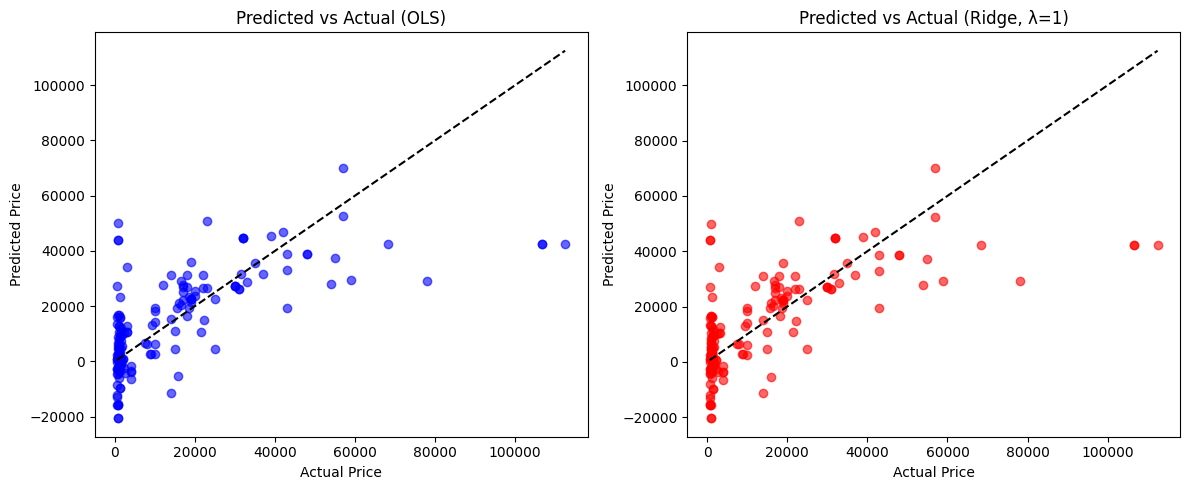

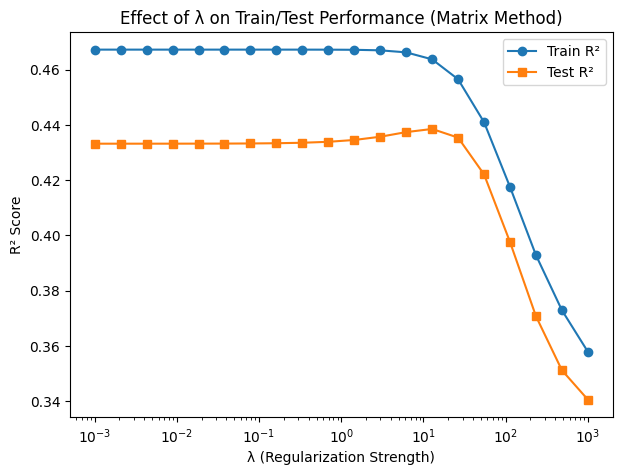


Ridge with Standardization - Test R²: 0.43359725561122675


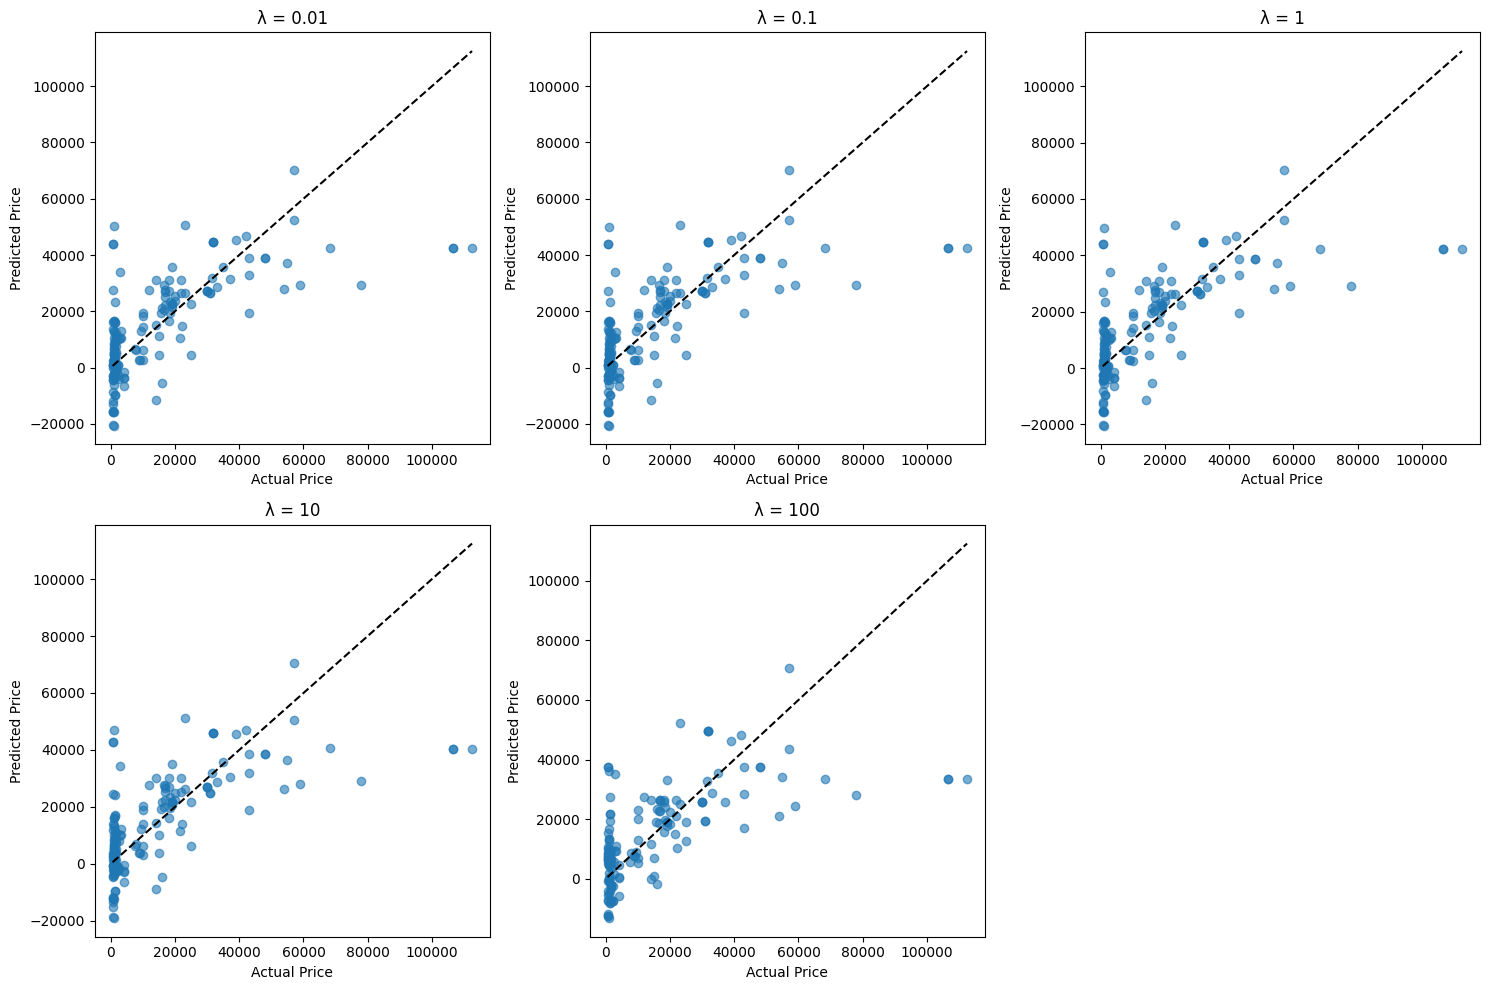

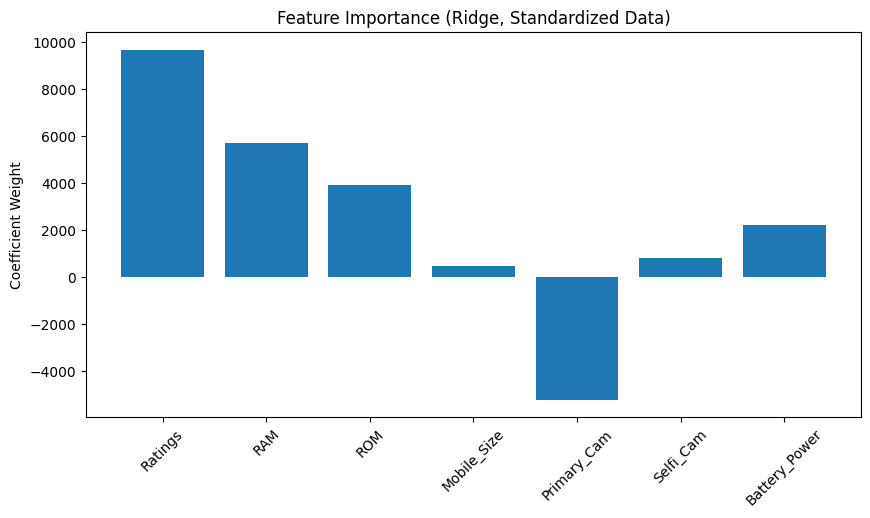


Feature Importances (Ridge, Standardized):
Ratings: 9694.1937
RAM: 5698.1985
ROM: 3940.0588
Mobile_Size: 479.2276
Primary_Cam: -5208.2896
Selfi_Cam: 834.8927
Battery_Power: 2214.9734


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ---------------------------------
# 1. Load dataset (replace with your dataset path)
# ---------------------------------
data = pd.read_csv("Mobile-Price-Prediction-cleaned_data.csv")  # must contain "price" column
X = data.drop("Price", axis=1).values
y = data["Price"].values.reshape(-1, 1)

# Add bias term (column of 1s)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------
# 2. Linear Regression (OLS, matrix method with pseudo-inverse)
# ---------------------------------
XtX = X_train.T @ X_train
Xty = X_train.T @ y_train
w_ols = np.linalg.pinv(XtX) @ Xty   # use pseudo-inverse to avoid singular error

y_pred_train = X_train @ w_ols
y_pred_test = X_test @ w_ols

print("OLS Train R²:", r2_score(y_train, y_pred_train))
print("OLS Test R²:", r2_score(y_test, y_pred_test))
print("OLS Test MSE:", mean_squared_error(y_test, y_pred_test))
print("OLS Test MAE:", mean_absolute_error(y_test, y_pred_test))

# ---------------------------------
# 3. Ridge Regression (L2 Regularization, λ = 1.0)
# ---------------------------------
lam = 1.0
d = X_train.shape[1]
I = np.eye(d)
I[0,0] = 0  # don't penalize bias term

w_ridge = np.linalg.pinv(XtX + lam * I) @ Xty

y_pred_train_ridge = X_train @ w_ridge
y_pred_test_ridge = X_test @ w_ridge

print("\nRidge Train R²:", r2_score(y_train, y_pred_train_ridge))
print("Ridge Test R²:", r2_score(y_test, y_pred_test_ridge))
print("Ridge Test MSE:", mean_squared_error(y_test, y_pred_test_ridge))
print("Ridge Test MAE:", mean_absolute_error(y_test, y_pred_test_ridge))

# ---------------------------------
# 4. Plot predicted vs actual (OLS vs Ridge)
# ---------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_test, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual (OLS)")

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test_ridge, alpha=0.6, color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual (Ridge, λ=1)")

plt.tight_layout()
plt.show()

# ---------------------------------
# 5. Train/Test R² vs λ
# ---------------------------------
lambdas = np.logspace(-3, 3, 20)
train_r2s, test_r2s = [], []

for lam in lambdas:
    w_r = np.linalg.pinv(XtX + lam * I) @ Xty
    train_r2s.append(r2_score(y_train, X_train @ w_r))
    test_r2s.append(r2_score(y_test, X_test @ w_r))

plt.figure(figsize=(7,5))
plt.semilogx(lambdas, train_r2s, "o-", label="Train R²")
plt.semilogx(lambdas, test_r2s, "s-", label="Test R²")
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("R² Score")
plt.title("Effect of λ on Train/Test Performance (Matrix Method)")
plt.legend()
plt.show()

# ---------------------------------
# 6. Standardization Comparison
# ---------------------------------
scaler = StandardScaler()
Xs = scaler.fit_transform(data.drop("Price", axis=1).values)
Xs = np.hstack([np.ones((Xs.shape[0],1)), Xs])  # add bias again

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    Xs, y, test_size=0.2, random_state=42
)

XtX_s = X_train_s.T @ X_train_s
Xty_s = X_train_s.T @ y_train_s
lam = 1.0
w_ridge_s = np.linalg.pinv(XtX_s + lam * I) @ Xty_s

y_pred_std = X_test_s @ w_ridge_s
print("\nRidge with Standardization - Test R²:", r2_score(y_test_s, y_pred_std))

# ---------------------------------
# 7. Predicted vs Actual for different λ
# ---------------------------------
plt.figure(figsize=(15,10))
for i, lam in enumerate([0.01, 0.1, 1, 10, 100]):
    w_r = np.linalg.pinv(XtX + lam * I) @ Xty
    y_pred = X_test @ w_r

    plt.subplot(2,3,i+1)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"λ = {lam}")

plt.tight_layout()
plt.show()

# ---------------------------------
# 8. Feature Importance (from Ridge weights)
# ---------------------------------
# Use standardized weights for interpretability
coefficients = w_ridge_s[1:].flatten()  # exclude bias
features = data.drop("Price", axis=1).columns

plt.figure(figsize=(10,5))
plt.bar(features, coefficients)
plt.xticks(rotation=45)
plt.ylabel("Coefficient Weight")
plt.title("Feature Importance (Ridge, Standardized Data)")
plt.show()

print("\nFeature Importances (Ridge, Standardized):")
for feat, coef in zip(features, coefficients):
    print(f"{feat}: {coef:.4f}")


Accuracy without regularization: 0.9854545454545455
Accuracy with L2 regularization: 0.9854545454545455


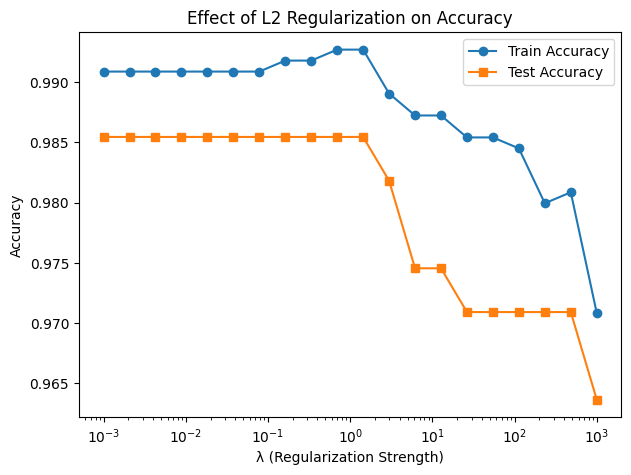

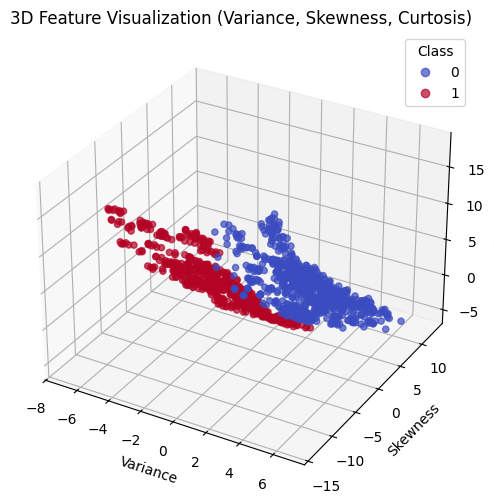

Accuracy on outlier-injected data: 0.9854545454545455


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# -----------------------------
# 1. Load dataset
# -----------------------------
data = pd.read_csv("BankNote_Authentication.csv")
X = data.iloc[:, :-1].values   # first 4 columns (features)
y = data.iloc[:, -1].values    # last column (class labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 2. Fit classification model with and without L2 regularization
# -----------------------------
# Logistic Regression without regularization (C → very large)
clf_no_reg = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
clf_no_reg.fit(X_train, y_train)

# Logistic Regression with L2 regularization (default)
clf_l2 = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=1000)
clf_l2.fit(X_train, y_train)

# Evaluate
acc_no_reg = accuracy_score(y_test, clf_no_reg.predict(X_test))
acc_l2 = accuracy_score(y_test, clf_l2.predict(X_test))

print("Accuracy without regularization:", acc_no_reg)
print("Accuracy with L2 regularization:", acc_l2)

# -----------------------------
# 3. Plot training & test accuracy vs λ
# -----------------------------
lambdas = np.logspace(-3, 3, 20)   # range of λ
train_accs, test_accs = [], []

for lam in lambdas:
    C = 1.0 / lam  # scikit-learn uses C = 1/λ
    clf = LogisticRegression(penalty="l2", C=C, solver="lbfgs", max_iter=1000)
    clf.fit(X_train, y_train)
    train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(7,5))
plt.semilogx(lambdas, train_accs, label="Train Accuracy", marker="o")
plt.semilogx(lambdas, test_accs, label="Test Accuracy", marker="s")
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Effect of L2 Regularization on Accuracy")
plt.legend()
plt.show()

# -----------------------------
# 4. 3D Visualization (three important features)
# -----------------------------
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap="coolwarm", alpha=0.7)
ax.set_xlabel("Variance")
ax.set_ylabel("Skewness")
ax.set_zlabel("Curtosis")
plt.title("3D Feature Visualization (Variance, Skewness, Curtosis)")
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()

# -----------------------------
# 5. Introduce Outliers
# -----------------------------
X_outlier = X.copy()
# Add large shifts to 10 random samples
np.random.seed(42)
indices = np.random.choice(len(X_outlier), 10, replace=False)
X_outlier[indices] += np.random.normal(loc=20, scale=5, size=X_outlier[indices].shape)

# Train-test split on outlier dataset
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(
    X_outlier, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 6. Fit classifier on outlier-injected data & evaluate
# -----------------------------
clf_outlier = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=1000)
clf_outlier.fit(X_train_o, y_train_o)

acc_outlier = accuracy_score(y_test_o, clf_outlier.predict(X_test_o))
print("Accuracy on outlier-injected data:", acc_outlier)
